In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ee = pd.read_csv("data/25100015.csv")

/Users/liaohungen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ee.dtypes

REF_DATE                           object
GEO                                object
DGUID                              object
Class of electricity producer      object
Type of electricity generation     object
UOM                                object
UOM_ID                              int64
SCALAR_FACTOR                      object
SCALAR_ID                           int64
VECTOR                             object
COORDINATE                         object
VALUE                             float64
STATUS                             object
SYMBOL                             object
TERMINATED                        float64
DECIMALS                            int64
dtype: object

In [4]:
ee.head(2)

,REF_DATE,GEO,DGUID,Class of electricity producer,Type of electricity generation,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Total all types of electricity generation,Megawatt hours,210,units,0,v44174609,1.1.1,59082501.0,NaN,NaN,NaN,0
1,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Hydraulic turbine,Megawatt hours,210,units,0,v44174610,1.1.2,36647695.0,NaN,NaN,NaN,0


In [5]:
def year(x):
    year = x[0:4]
    return year

def month(x):
    month = x[5:]
    return month

def oil(x):
    oil = ['10', '11', '12', '01', '02', '03']
    if x in oil:
        return 1
    else:
        return 0

In [6]:
ee['year'] = ee['REF_DATE'].apply(year)
ee['month'] = ee['REF_DATE'].apply(month) 
ee['oil'] = ee['month'].apply(oil)

# wind ennergy

In [7]:
windall = ee[(ee['GEO']=='Prince Edward Island') & (ee['Type of electricity generation'].str.contains('Wind')) 
   & (ee['Class of electricity producer'].str.contains('Total')) & (ee['year'] != '2021')]

In [8]:
y = windall.groupby(['year'])['VALUE'].agg('sum').reset_index()

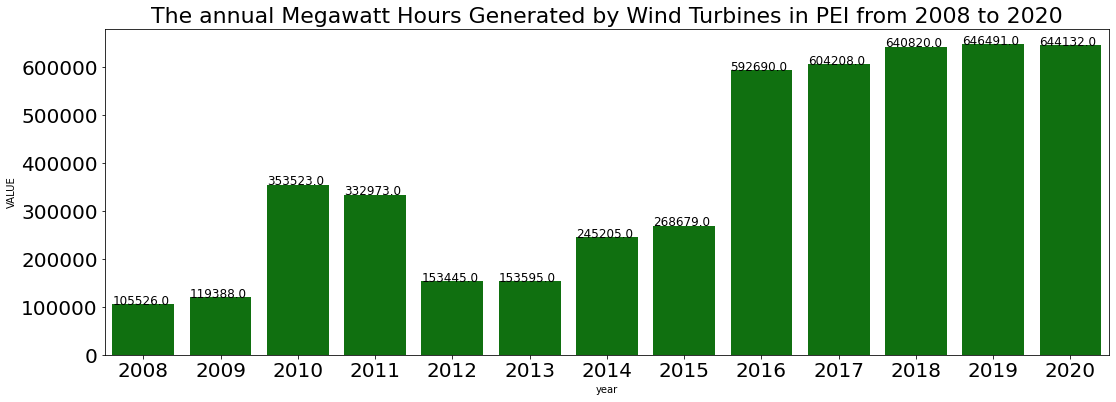

In [9]:
plt.figure(figsize=(18,6))
ax2 = sns.barplot(x='year', y='VALUE', data=y, color='green')
plt.title('The annual Megawatt Hours Generated by Wind Turbines in PEI from 2008 to 2020', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for p in ax2.patches:
    count = '{:}'.format(p.get_height())
    ax2.annotate(count, (p.get_x(), p.get_height()+3), fontsize = 12, color='black')

plt.savefig("Windannual.png")

## only consider heating season

In [10]:
oiluse = windall[windall['oil'] == 1]

In [11]:
o = oiluse.groupby(['year'])['VALUE'].agg('sum').reset_index()

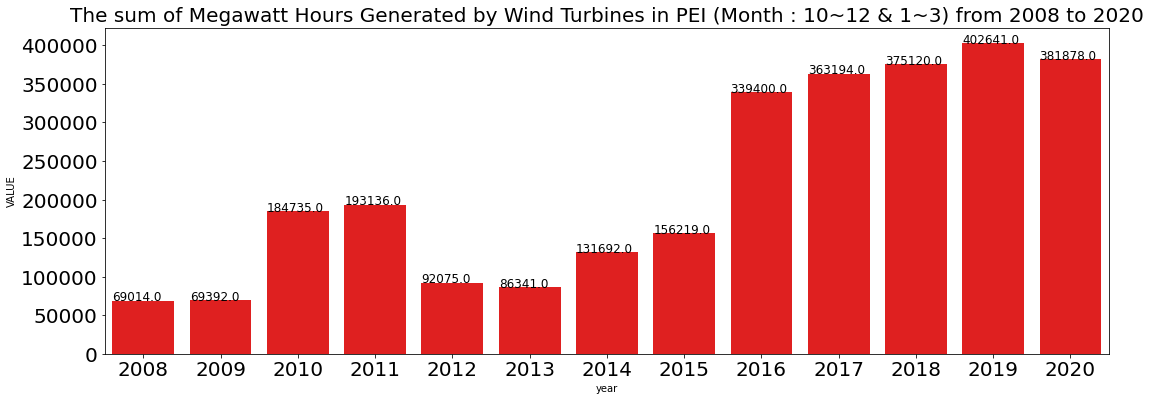

In [12]:
plt.figure(figsize=(18,6))
ax2 = sns.barplot(x='year', y='VALUE', data=o, color='red')
plt.title('The sum of Megawatt Hours Generated by Wind Turbines in PEI (Month : 10~12 & 1~3) from 2008 to 2020', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for p in ax2.patches:
    count = '{:}'.format(p.get_height())
    ax2.annotate(count, (p.get_x(), p.get_height()+3), fontsize = 12, color='black')

plt.savefig("Windheat.png")

In [13]:
ee

,REF_DATE,GEO,DGUID,Class of electricity producer,Type of electricity generation,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,year,month,oil
0,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Total all types of electricity generation,Megawatt hours,210,units,0,v44174609,1.1.1,59082501.0,NaN,NaN,NaN,0,2008,01,1
1,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Hydraulic turbine,Megawatt hours,210,units,0,v44174610,1.1.2,36647695.0,NaN,NaN,NaN,0,2008,01,1
2,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Conventional steam turbine,Megawatt hours,210,units,0,v44174611,1.1.3,11021441.0,NaN,NaN,NaN,0,2008,01,1
3,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Nuclear steam turbine,Megawatt hours,210,units,0,v44174612,1.1.4,8963878.0,NaN,NaN,NaN,0,2008,01,1
4,2008-01,Canada,2016A000011124,Total all classes of electricity producer,Internal combustion turbine,Megawatt hours,210,units,0,v44174613,1.1.5,105643.0,NaN,NaN,NaN,0,2008,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50665,2021-11,Nunavut,2016A000262,"Electricity producers, industries",Total electricity production from combustible ...,Megawatt hours,210,units,0,v1059484873,14.3.11,NaN,..,NaN,NaN,0,2021,11,1
50666,2021-11,Nunavut,2016A000262,"Electricity producers, industries",Total electricity production from non-renewabl...,Megawatt hours,210,units,0,v1146006371,14.3.12,NaN,..,NaN,NaN,0,2021,11,1
50667,2021-11,Nunavut,2016A000262,"Electricity producers, industries",Total electricity production from biomass,Megawatt hours,210,units,0,v1146006413,14.3.13,NaN,..,NaN,NaN,0,2021,11,1
50668,2021-11,Nunavut,2016A000262,"Electricity producers, industries",Wind power turbine,Megawatt hours,210,units,0,v1059484906,14.3.8,NaN,..,NaN,NaN,0,2021,11,1


## generation distribution in a year

In [14]:
targetyear = '2016'

In [15]:
windayear = ee[(ee['GEO']=='Prince Edward Island') & (ee['Type of electricity generation'].str.contains('Wind')) 
   & (ee['Class of electricity producer'].str.contains('Total')) & (ee['REF_DATE'].str.contains(targetyear))]

In [16]:
windayear.head()

,REF_DATE,GEO,DGUID,Class of electricity producer,Type of electricity generation,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,year,month,oil
22253,2016-01,Prince Edward Island,2016A000211,Total all classes of electricity producer,Wind power turbine,Megawatt hours,210,units,0,v44174714,3.1.8,57175.0,NaN,NaN,NaN,0,2016,01,1
22627,2016-02,Prince Edward Island,2016A000211,Total all classes of electricity producer,Wind power turbine,Megawatt hours,210,units,0,v44174714,3.1.8,55547.0,NaN,NaN,NaN,0,2016,02,1
23001,2016-03,Prince Edward Island,2016A000211,Total all classes of electricity producer,Wind power turbine,Megawatt hours,210,units,0,v44174714,3.1.8,54254.0,NaN,NaN,NaN,0,2016,03,1
23375,2016-04,Prince Edward Island,2016A000211,Total all classes of electricity producer,Wind power turbine,Megawatt hours,210,units,0,v44174714,3.1.8,51223.0,NaN,NaN,NaN,0,2016,04,0
23749,2016-05,Prince Edward Island,2016A000211,Total all classes of electricity producer,Wind power turbine,Megawatt hours,210,units,0,v44174714,3.1.8,44619.0,NaN,NaN,NaN,0,2016,05,0


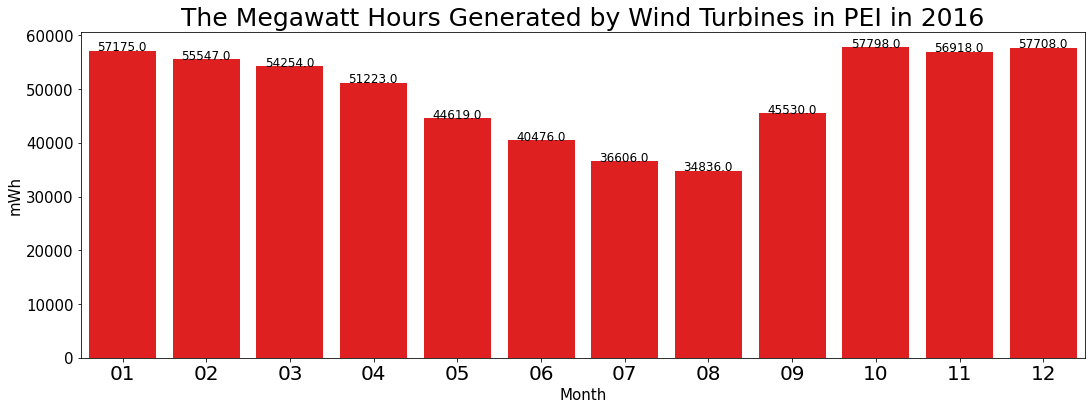

In [17]:
plt.figure(figsize=(18,6))
ax2 = sns.barplot(x='month', y='VALUE', data=windayear, color='red')
plt.title('The Megawatt Hours Generated by Wind Turbines in PEI in {}'.format(targetyear), fontsize=25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('mWh', fontsize=15, rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

for p in ax2.patches:
    count = '{:}'.format(p.get_height())
    ax2.annotate(count, (p.get_x()+0.1, p.get_height()+3), fontsize = 12, color='black')

plt.savefig("Wind2016.png")

# Solar Energy

In [63]:
renewable = [ 'Tidal power turbine', 'Wind power turbine', 'Solar', 'Hydraulic turbine', 
             'Total electricity production from biomass']

In [64]:
solarall = ee[(ee['GEO']=='Prince Edward Island') & (ee['Type of electricity generation'].str.contains('Solar')) 
   &(ee['year'] != '2021') & (ee['Class of electricity producer'].str.contains('utilities'))]

In [65]:
y = solarall.groupby(['year','Type of electricity generation'])['VALUE'].agg('sum').reset_index()

In [66]:
y

,year,Type of electricity generation,VALUE
0,2016,Solar,0.0
1,2017,Solar,0.0
2,2018,Solar,262.0
3,2019,Solar,566.0
4,2020,Solar,573.0


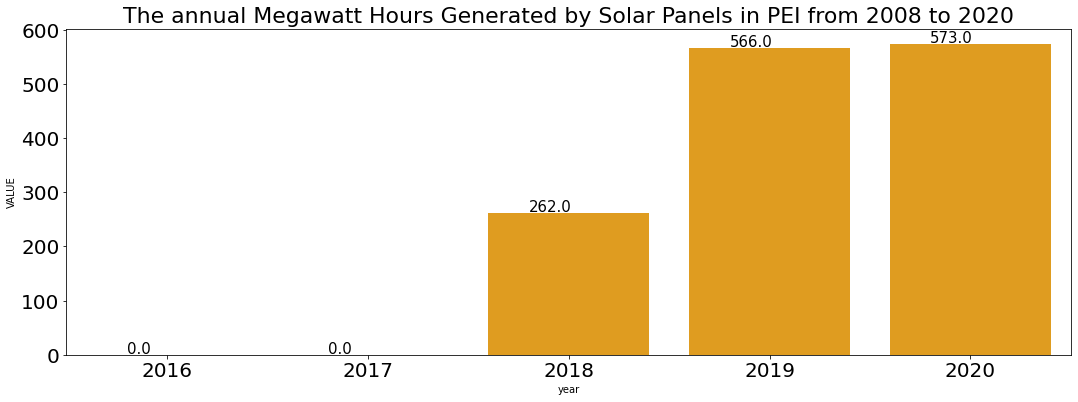

In [67]:
plt.figure(figsize=(18,6))
ax2 = sns.barplot(x='year', y='VALUE', data=y, color='orange')
plt.title('The annual Megawatt Hours Generated by Solar Panels in PEI from 2008 to 2020', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for p in ax2.patches:
    count = '{:}'.format(p.get_height())
    ax2.annotate(count, (p.get_x()+0.2, p.get_height()+3), fontsize = 15, color='black')

plt.savefig("Solarannual.png")

## only consider heating season

In [68]:
oiluse = solarall[solarall['oil'] == 1]

In [69]:
o = oiluse.groupby(['year'])['VALUE'].agg('sum').reset_index()

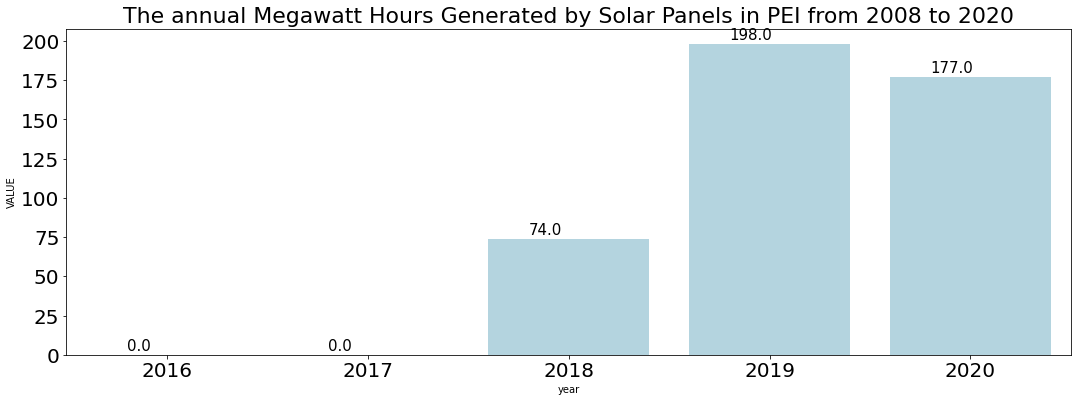

In [70]:
plt.figure(figsize=(18,6))
ax2 = sns.barplot(x='year', y='VALUE', data=o, color='lightblue')
plt.title('The annual Megawatt Hours Generated by Solar Panels in PEI from 2008 to 2020', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for p in ax2.patches:
    count = '{:}'.format(p.get_height())
    ax2.annotate(count, (p.get_x()+0.2, p.get_height()+3), fontsize = 15, color='black')

plt.savefig("Solarannual.png")